Capstone Project

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("OnlineRetail.csv", encoding = 'latin')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom
5,539993,85099B,JUMBO BAG RED RETROSPOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
6,539993,20682,RED RETROSPOT CHILDRENS UMBRELLA,6,1/4/2011 10:00,3.25,13313.0,United Kingdom
7,539993,22961,JAM MAKING SET PRINTED,12,1/4/2011 10:00,1.45,13313.0,United Kingdom
8,539993,22667,RECIPE BOX RETROSPOT,6,1/4/2011 10:00,2.95,13313.0,United Kingdom
9,539993,22898,CHILDRENS APRON APPLES DESIGN,8,1/4/2011 10:00,1.95,13313.0,United Kingdom


Important Dataset

   1. since data in form excel_csv file we to have use pandas read_csv to load the data.
   2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation       such as null values in a column or a row.
   3. Check whether any null values are there or not.
       > Checking for missing values using isnull() and notnull()
       > To fill missing value we us fillna() and replace()

 we see in dataset thier are "Description" feature if we remove from the dataset they dont impact our EDA part and Model 

In [4]:
df = df.drop("Description", axis = 1)  # axis = 1 mean along column

In [5]:
#check for succesfully drop Description cloumn(feature)
df.head(10)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom
5,539993,85099B,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
6,539993,20682,6,1/4/2011 10:00,3.25,13313.0,United Kingdom
7,539993,22961,12,1/4/2011 10:00,1.45,13313.0,United Kingdom
8,539993,22667,6,1/4/2011 10:00,2.95,13313.0,United Kingdom
9,539993,22898,8,1/4/2011 10:00,1.95,13313.0,United Kingdom


1. Understand the dataset and datatype(we use .info() function to understand datatype)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400068 entries, 0 to 400067
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    400068 non-null  object 
 1   StockCode    400068 non-null  object 
 2   Quantity     400068 non-null  int64  
 3   InvoiceDate  400068 non-null  object 
 4   UnitPrice    400068 non-null  float64
 5   CustomerID   305869 non-null  float64
 6   Country      400068 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 21.4+ MB


 There are 7 feature in our dataframe, 4 are string ,1 are integer, 2 are float.
 we check these datatype and change dataype into suitable datatype.
 Here we see that "InvoiceDate" feature in string format, we should change in Datetime format

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
#check datatype again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400068 entries, 0 to 400067
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    400068 non-null  object        
 1   StockCode    400068 non-null  object        
 2   Quantity     400068 non-null  int64         
 3   InvoiceDate  400068 non-null  datetime64[ns]
 4   UnitPrice    400068 non-null  float64       
 5   CustomerID   305869 non-null  float64       
 6   Country      400068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.4+ MB


In [9]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


2. We find count and distinct count for each column.

In [10]:
df.count()

InvoiceNo      400068
StockCode      400068
Quantity       400068
InvoiceDate    400068
UnitPrice      400068
CustomerID     305869
Country        400068
dtype: int64

In [11]:
df.nunique()

InvoiceNo      19923
StockCode       3942
Quantity         616
InvoiceDate    18027
UnitPrice       1408
CustomerID      3904
Country           38
dtype: int64

3. Now we find out any column has null value or not and we also deal with null value

In [12]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94199
Country            0
dtype: int64

We find "CustomerID " feature contain null value, so we drop the null value they do not effect beacuse customerid our main feature

In [13]:
df = df.dropna(subset = ['CustomerID'])

In [14]:
#check
df.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now we check Negativity,so we have feature 'Quantity' and 'UnitPrice' and check negativity and remove also. 

In [15]:
df = df[df.Quantity > 0]

In [16]:
df[df.Quantity<= 0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [17]:
df[df.UnitPrice < 0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Revenue Per Month ( For Revenue we multiply "Quantity" and "UnitPrice" column )

In [18]:
df["Revenue"] = df["Quantity"]*df["UnitPrice"]

<ipython-input-18-74b1fdd8c8c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Revenue"] = df["Quantity"]*df["UnitPrice"]


In [19]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5


There are "revenue" column created (now we add feature "Day" ,"Month", "year")

In [20]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df.head()

<ipython-input-20-89eb9eee9568>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["InvoiceDate"].dt.year
<ipython-input-20-89eb9eee9568>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["InvoiceDate"].dt.month


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011,1,4
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011,1,4
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011,1,4


Now we want only month and revenue(total revenue per month)

In [21]:
Rev_Permonth = df.groupby(['Month'])['Revenue'].sum().reset_index()
Rev_Permonth

,Month,Revenue
0,1,569445.040
1,2,447137.350
2,3,595500.760
3,4,469200.361
4,5,678594.560
5,6,661213.690
6,7,600091.011
7,8,645343.900
8,9,952838.382
9,10,1039318.790


Text(0, 0.5, 'Revenue in Millions')

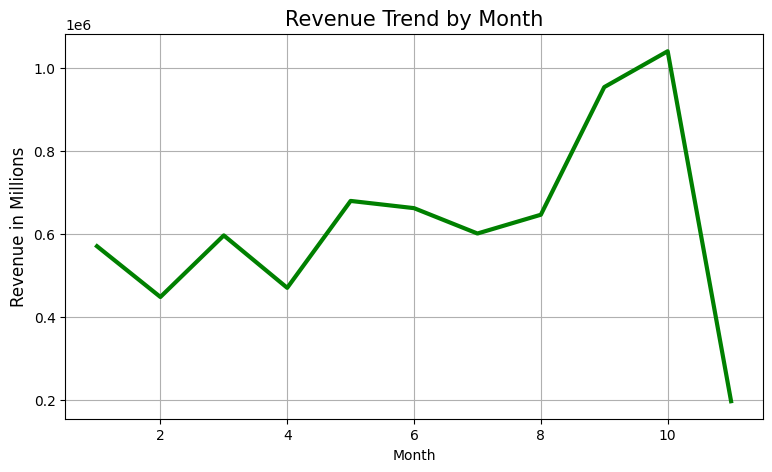

In [22]:
Rev_Permonth.plot(x='Month', y = 'Revenue',figsize= (9, 5), linewidth = 3,
                      color = ['Green'], legend = None, grid = True)
plt.title('Revenue Trend by Month', fontsize = 15)
plt.ylabel('Revenue in Millions', fontsize = 12)





There are more Revenue made at the end of the year(Specially in Month of November), otherwise overall Revenue whole year are approx (400K to 700K)

Cumulative Revenue for across all Month( Use cumsum() function to find the cumulative sum of the values along the index axis)

In [23]:
Rev_Permonth['Cumulative Revenue Monthly'] = Rev_Permonth['Revenue'].cumsum()
Rev_Permonth

,Month,Revenue,Cumulative Revenue Monthly
0,1,569445.040,569445.040
1,2,447137.350,1016582.390
2,3,595500.760,1612083.150
3,4,469200.361,2081283.511
4,5,678594.560,2759878.071
5,6,661213.690,3421091.761
6,7,600091.011,4021182.772
7,8,645343.900,4666526.672
8,9,952838.382,5619365.054
9,10,1039318.790,6658683.844


Text(0, 0.5, 'Cumulative Revenue in Millions')

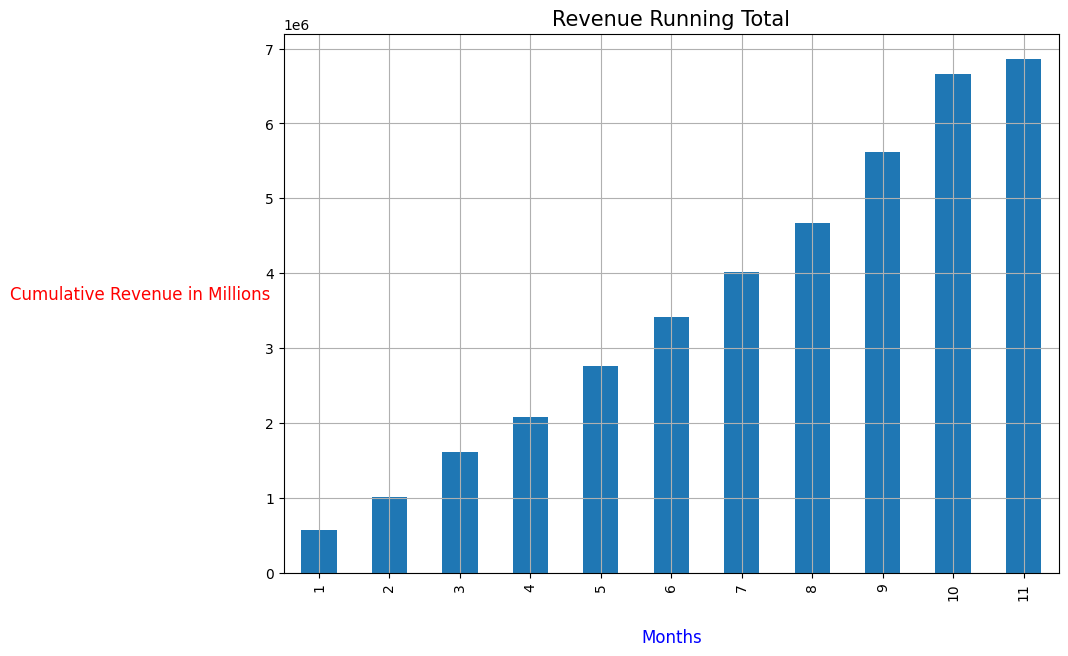

In [24]:
Rev_Permonth.plot(x='Month', y='Cumulative Revenue Monthly', kind='bar',
        figsize=(10,7), legend=False, style='yo-', grid = True)
plt.title('Revenue Running Total', fontsize=15);
plt.xlabel('Months' , fontsize = 12, color = 'blue', labelpad = 20)
plt.ylabel('Cumulative Revenue in Millions', rotation = 0, fontsize = 12, labelpad = 90, color = 'Red')

Monthly Percent Change in Growth Rate(we use pct_change() function calculates the percentage change between the current and a prior element)

In [25]:
# here we use round fumction and multiply by 100 to remove decimal and show perctange change
Rev_Permonth['Monthly Percent Change'] = Rev_Permonth['Revenue'].pct_change().round(3)*100 
Rev_Permonth

,Month,Revenue,Cumulative Revenue Monthly,Monthly Percent Change
0,1,569445.040,569445.040,NaN
1,2,447137.350,1016582.390,-21.5
2,3,595500.760,1612083.150,33.2
3,4,469200.361,2081283.511,-21.2
4,5,678594.560,2759878.071,44.6
5,6,661213.690,3421091.761,-2.6
6,7,600091.011,4021182.772,-9.2
7,8,645343.900,4666526.672,7.5
8,9,952838.382,5619365.054,47.6
9,10,1039318.790,6658683.844,9.1


In [26]:
# There are "NaN" so we fill with fillna(0) beacuse its affect the result
Rev_Permonth.fillna(0, inplace =  True)# we use inplace True for permanent modified data
Rev_Permonth

,Month,Revenue,Cumulative Revenue Monthly,Monthly Percent Change
0,1,569445.040,569445.040,0.0
1,2,447137.350,1016582.390,-21.5
2,3,595500.760,1612083.150,33.2
3,4,469200.361,2081283.511,-21.2
4,5,678594.560,2759878.071,44.6
5,6,661213.690,3421091.761,-2.6
6,7,600091.011,4021182.772,-9.2
7,8,645343.900,4666526.672,7.5
8,9,952838.382,5619365.054,47.6
9,10,1039318.790,6658683.844,9.1


Text(0, 0.5, 'Percentage')

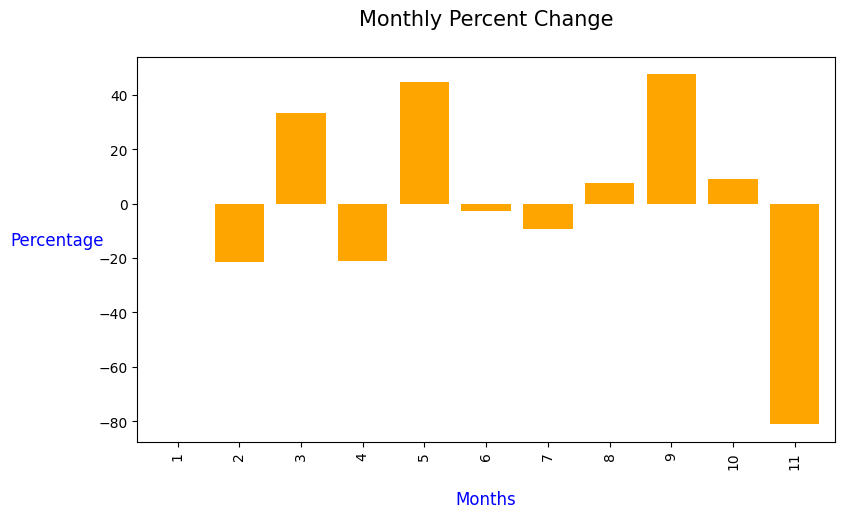

In [27]:
Rev_Permonth.plot(x='Month', y='Monthly Percent Change', kind='bar',
        figsize=(9,5), legend=False, width = .8, color = ['Orange'])
plt.title('Monthly Percent Change\n', fontsize=15);
plt.xlabel('Months' , fontsize = 12, color = 'Blue', labelpad = 15)
plt.ylabel('Percentage', rotation = 0, fontsize = 12, labelpad = 30, color = 'Blue')

Here we clear see that in December month 55.4% decrease

Revenue by country

In [28]:
Rev_Permonth = df.groupby("Country").agg({"Revenue" : "sum"}).round(3).sort_values(by = 'Revenue',  ascending = False).reset_index()
Rev_Permonth

,Country,Revenue
0,United Kingdom,5530979.084
1,Netherlands,243546.740
2,EIRE,222326.740
3,Germany,179088.170
4,France,165397.870
5,Australia,131846.660
6,Spain,51849.480
7,Switzerland,47020.070
8,Belgium,33325.970
9,Sweden,31583.800


Text(0, 0.5, 'Revenue')

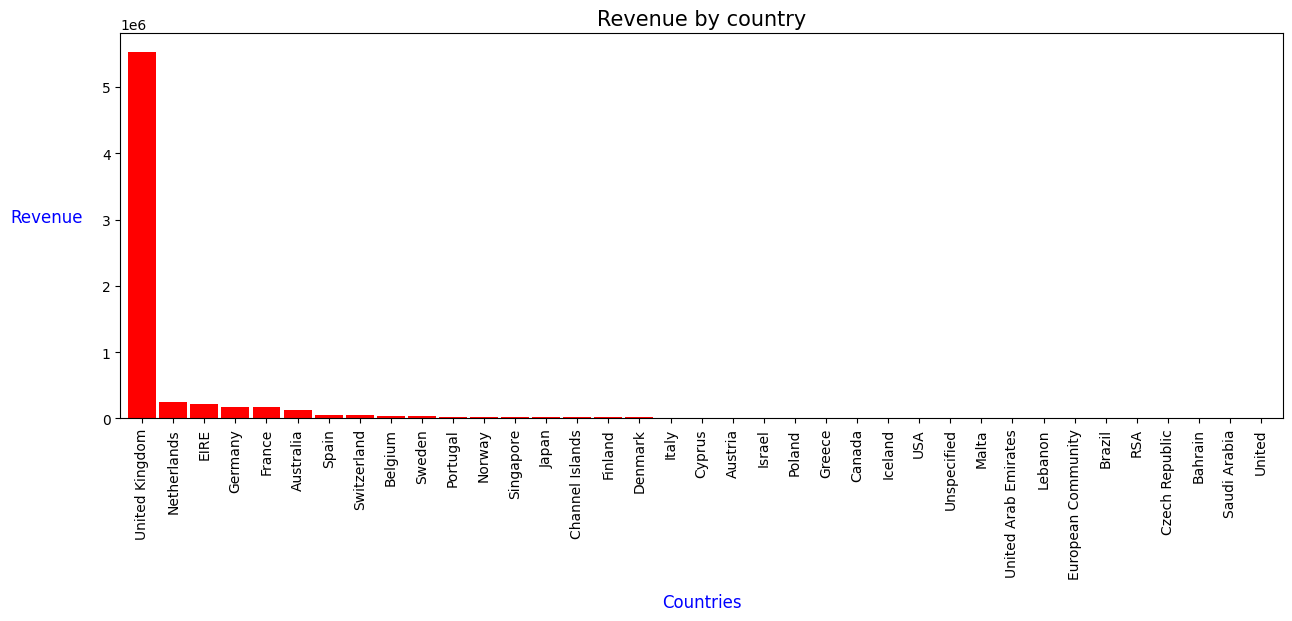

In [29]:
Rev_Permonth.plot(x='Country', y='Revenue', kind='bar',
        figsize=(15,5), legend=False, width = .9, color = ['Red'])
plt.title('Revenue by country', fontsize=15);
plt.xlabel('Countries' , fontsize = 12, color = 'Blue', labelpad = 10)
plt.ylabel('Revenue', rotation = 0, fontsize = 12, labelpad = 40, color = 'Blue')

here we clearly see that most of revenue generated through one country "United Kingdom"

Total active customer(unique count of customer id) by country and month

In [30]:
Active_customer = df.groupby(['Country']).agg({'CustomerID':'nunique'}).sort_values(by='CustomerID' , ascending = False).reset_index()
Active_customer.rename(columns = {"CustomerID" : "Customers"}) # here i do rename because i want customer no. not customer id

,Country,Customers
0,United Kingdom,3505
1,Germany,85
2,France,78
3,Spain,26
4,Belgium,25
5,Switzerland,19
6,Portugal,14
7,Finland,11
8,Norway,10
9,Australia,9


Text(0, 0.5, 'Customers')

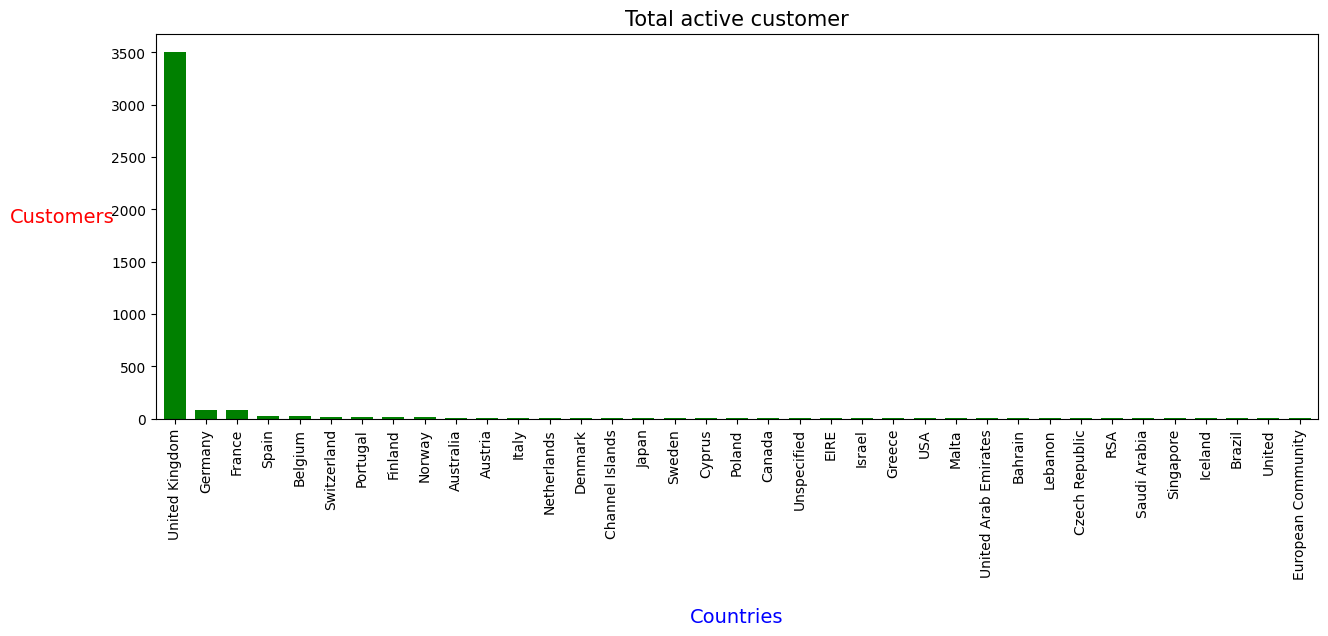

In [31]:
Active_customer.plot(x='Country', y='CustomerID', kind='bar',
        figsize=(15,5), legend=False, width = .7, color = ['Green'])
plt.title('Total active customer', fontsize=15);
plt.xlabel('Countries' , fontsize = 14, color = 'Blue', labelpad = 20)
plt.ylabel('Customers', rotation = 0, fontsize = 14, labelpad = 35, color = 'Red')

Total active customer by month

In [32]:
Customer_month = df.groupby(['Month']).agg({'CustomerID':'nunique'}).sort_values(by="Month" , ascending = True).reset_index()
Customer_month.rename(columns={'CustomerID':'Customers'})

,Month,Customers
0,1,741
1,2,758
2,3,974
3,4,856
4,5,1056
5,6,991
6,7,949
7,8,935
8,9,1266
9,10,1364


Text(0, 0.5, 'Customers')

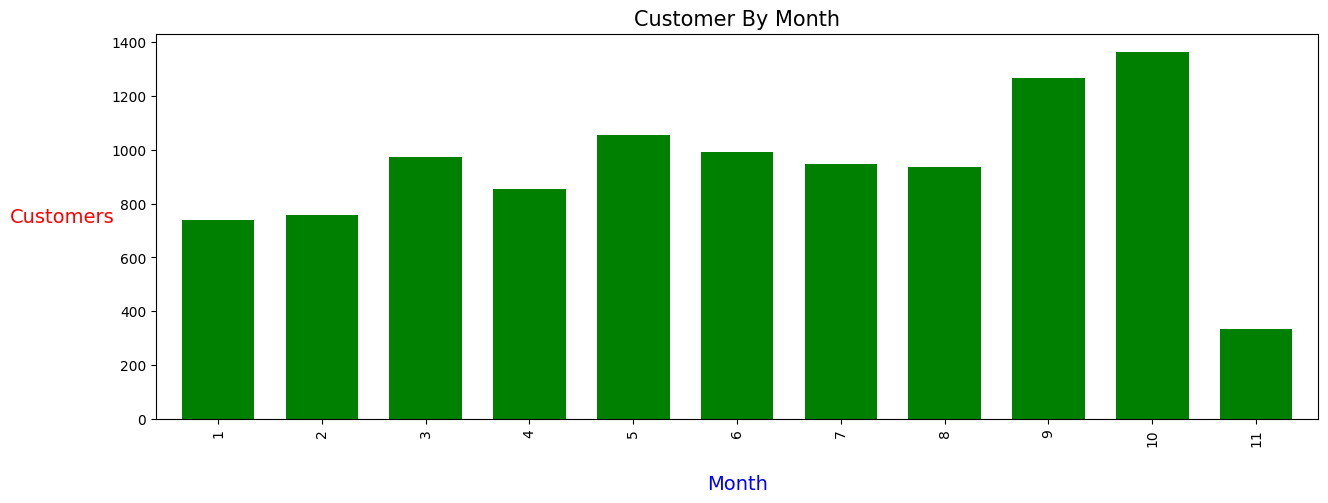

In [33]:
Customer_month.plot(x='Month', y='CustomerID', kind='bar',
        figsize=(15,5), legend=False, width = .7, color = ['Green'])
plt.title('Customer By Month', fontsize=15);
plt.xlabel('Month' , fontsize = 14, color = 'Blue', labelpad = 20)
plt.ylabel('Customers', rotation = 0, fontsize = 14, labelpad = 35, color = 'Red')

Total orders by country and month

In [34]:
Order_by_country = df.groupby(['Country']).agg({'InvoiceNo':'nunique'}).sort_values(by = 'InvoiceNo',ascending = False).reset_index()
Order_by_country.rename(columns={'InvoiceNo' : 'Orders'})

,Country,Orders
0,United Kingdom,12611
1,Germany,346
2,France,297
3,EIRE,199
4,Belgium,80
5,Netherlands,77
6,Spain,72
7,Australia,51
8,Switzerland,43
9,Portugal,38


Text(0, 0.5, 'Customers')

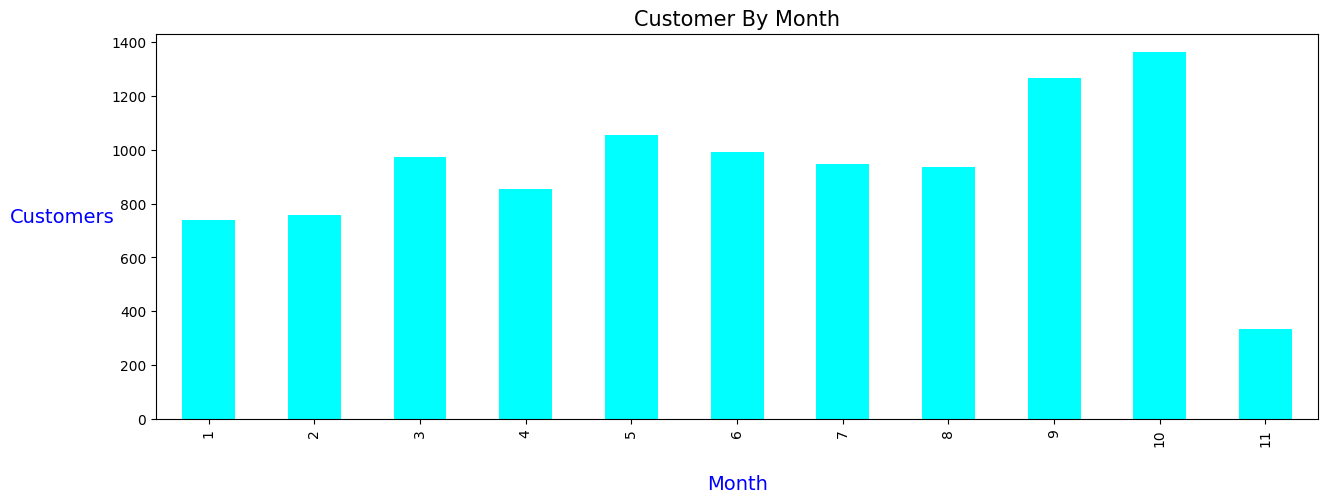

In [35]:
Customer_month.plot(x='Month', y='CustomerID', kind='bar',
        figsize=(15,5), legend=False, width = .5, color = ['cyan'])
plt.title('Customer By Month', fontsize=15);
plt.xlabel('Month' , fontsize = 14, color = 'Blue', labelpad = 20)
plt.ylabel('Customers', rotation = 0, fontsize = 14, labelpad = 35, color = 'Blue')

In [36]:
Order_by_Month = df.groupby(['Month']).agg({'InvoiceNo':'nunique'}).sort_values(by = 'Month',ascending = True).reset_index()
Order_by_Month.rename(columns={'InvoiceNo' : 'Orders'})

,Month,Orders
0,1,987
1,2,998
2,3,1321
3,4,1149
4,5,1555
5,6,1393
6,7,1331
7,8,1281
8,9,1756
9,10,1929


Text(0, 0.5, 'Customers')

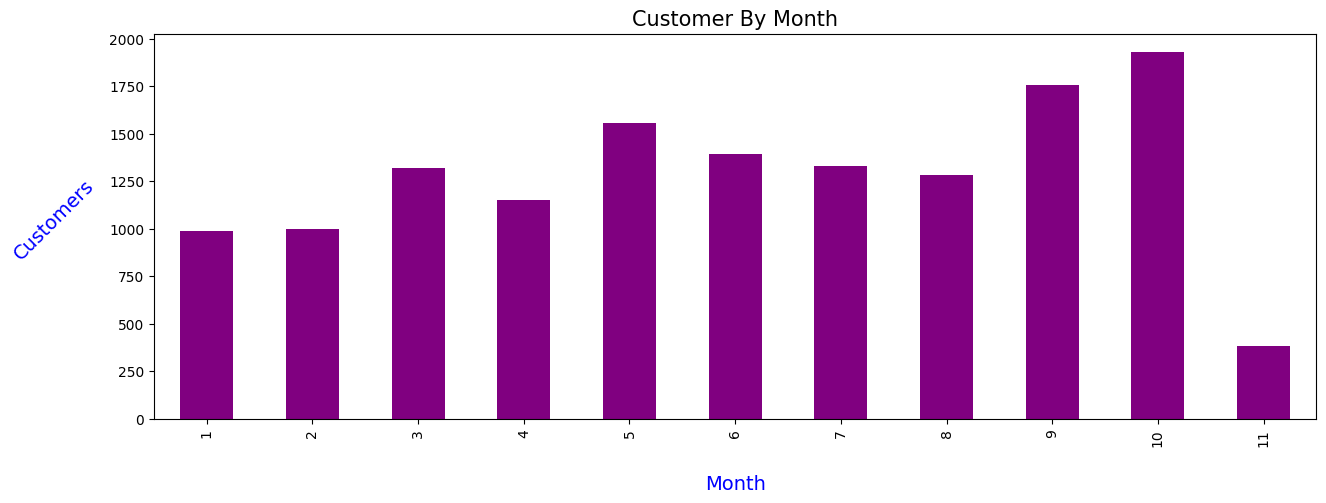

In [37]:
Order_by_Month.plot(x='Month', y = 'InvoiceNo', kind='bar',
        figsize=(15,5), legend=False, width = .5, color = ['purple'])
plt.title('Customer By Month', fontsize=15);
plt.xlabel('Month' , fontsize = 14, color = 'Blue', labelpad = 20)
plt.ylabel('Customers', rotation = 45, fontsize = 14, labelpad = 35, color = 'Blue')

Total orderlines by country and month

In [38]:
Orderlines_country = df.groupby(['Country']).agg({'InvoiceNo':'count'}).sort_values(by = 'InvoiceNo',ascending = False).reset_index()
Orderlines_country.rename(columns={'InvoiceNo' : 'Orderlines'})

,Country,Orderlines
0,United Kingdom,263921
1,Germany,7176
2,France,6336
3,EIRE,5670
4,Spain,2123
5,Netherlands,2050
6,Belgium,1671
7,Switzerland,1568
8,Australia,1118
9,Portugal,1112


Text(0, 0.5, 'Orderlines')

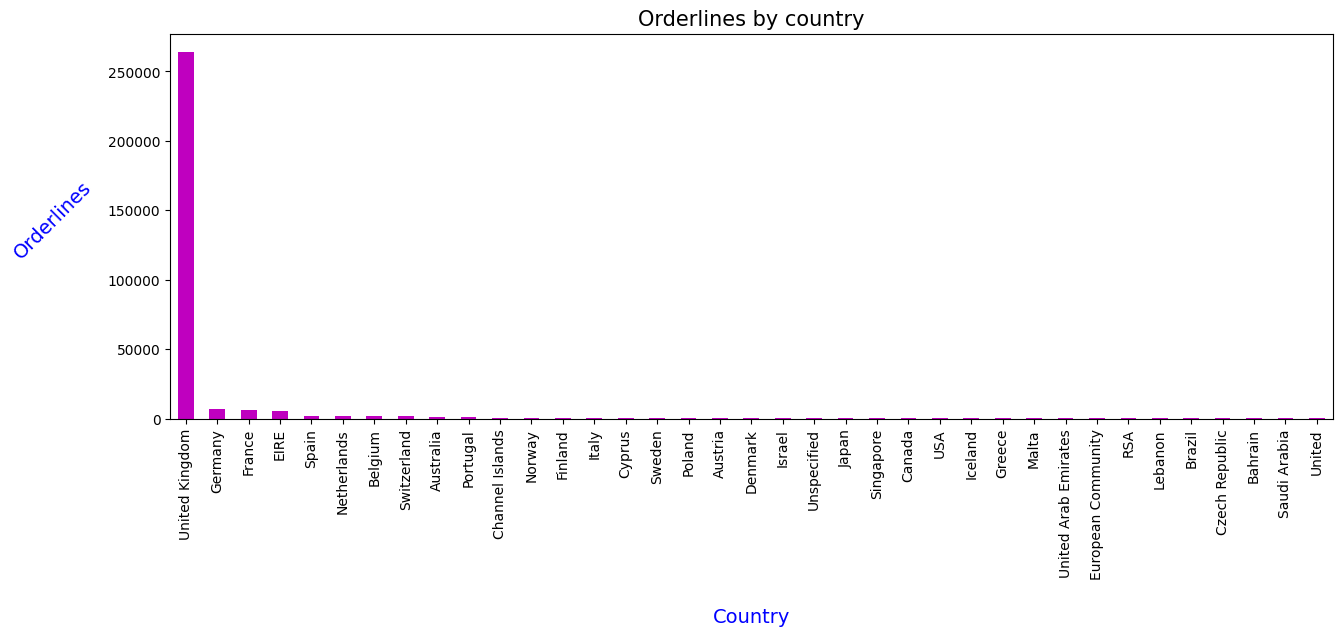

In [39]:
Orderlines_country.plot(x='Country', y = 'InvoiceNo', kind='bar',
        figsize=(15,5), legend=False, width = .5, color = ['m'])
plt.title('Orderlines by country', fontsize=15);
plt.xlabel('Country' , fontsize = 14, color = 'Blue', labelpad = 20)
plt.ylabel('Orderlines', rotation = 45, fontsize = 14, labelpad = 35, color = 'Blue')

In [40]:
Orderlines_by_Month = df.groupby(['Month']).agg({'InvoiceNo':'count'}).sort_values(by = 'Month',ascending = True).reset_index()
Orderlines_by_Month.rename(columns={'InvoiceNo' : 'Orderlines'})

,Month,Orderlines
0,1,21232
1,2,19928
2,3,27177
3,4,22644
4,5,28322
5,6,27185
6,7,26827
7,8,27013
8,9,40030
9,10,49557


Text(0, 0.5, 'Orderlines')

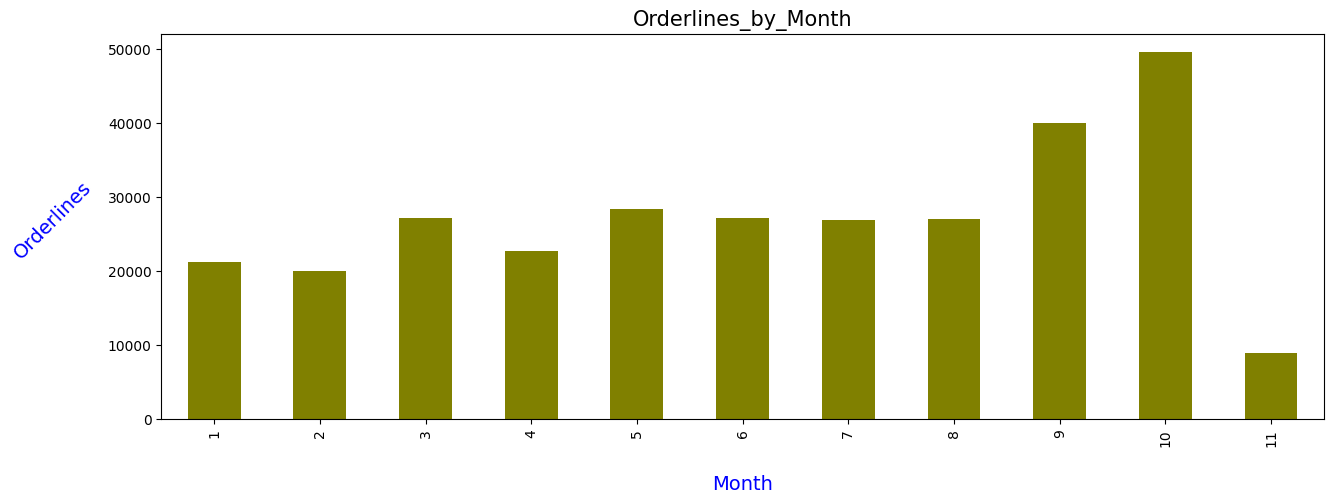

In [41]:
Orderlines_by_Month.plot(x='Month', y = 'InvoiceNo', kind='bar',
        figsize=(15,5), legend=False, width = .5, color = ["olive"])
plt.title('Orderlines_by_Month', fontsize=15);
plt.xlabel('Month' , fontsize = 14, color = 'Blue', labelpad = 20)
plt.ylabel('Orderlines', rotation = 45, fontsize = 14, labelpad = 35, color = 'Blue')

Total SKU (distinct count of Stock code) by country and month

In [42]:
SKU_by_country = df.groupby(['Country']).agg({'StockCode':'nunique'}).sort_values(by = 'StockCode',ascending = False).reset_index()
SKU_by_country

,Country,StockCode
0,United Kingdom,3516
1,EIRE,1756
2,Germany,1514
3,France,1312
4,Spain,1003
5,Switzerland,814
6,Netherlands,721
7,Belgium,685
8,Australia,580
9,Portugal,577


Text(0, 0.5, 'StockCode')

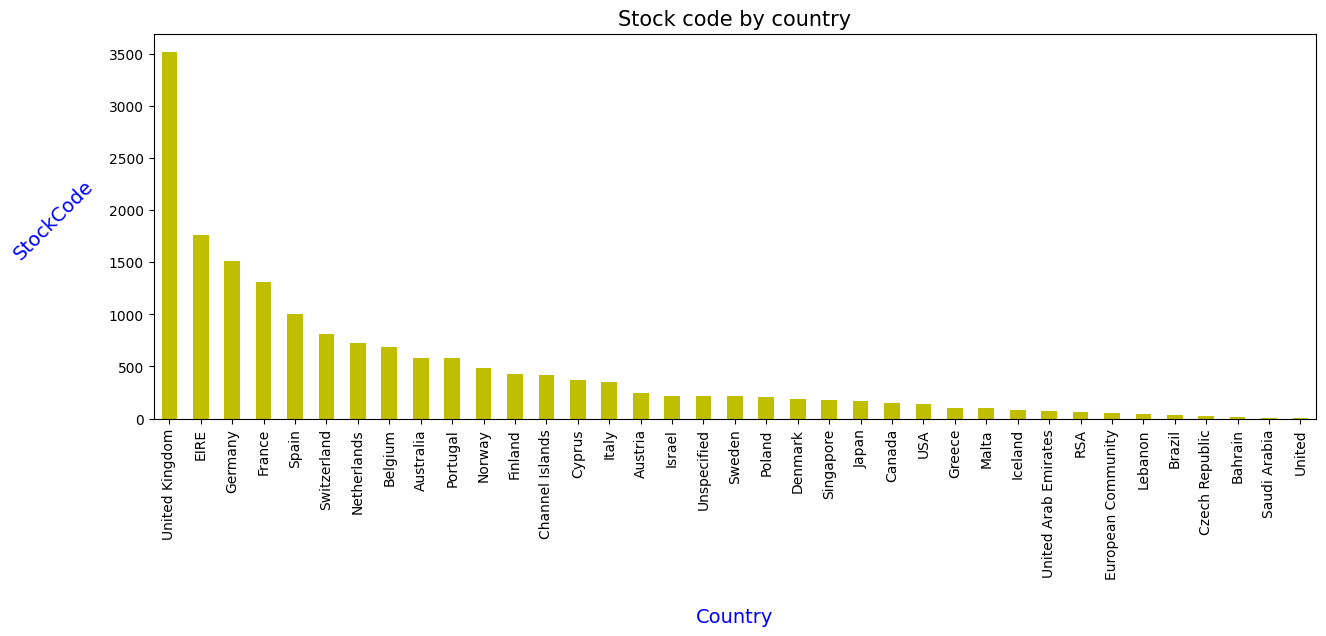

In [43]:
SKU_by_country.plot(x='Country', y = 'StockCode', kind='bar',
        figsize=(15,5), legend=False, width = .5, color = ["y"])
plt.title('Stock code by country', fontsize=15);
plt.xlabel('Country' , fontsize = 14, color = 'Blue', labelpad = 20)
plt.ylabel('StockCode', rotation = 45, fontsize = 14, labelpad = 35, color = 'Blue')

In [44]:
SKU_by_Month = df.groupby(['Month']).agg({'StockCode':'nunique'}).sort_values(by = 'Month',ascending = True).reset_index()
SKU_by_Month

,Month,StockCode
0,1,2121
1,2,2124
2,3,2234
3,4,2217
4,5,2219
5,6,2339
6,7,2351
7,8,2356
8,9,2545
9,10,2622


Text(0, 0.5, 'StockCode')

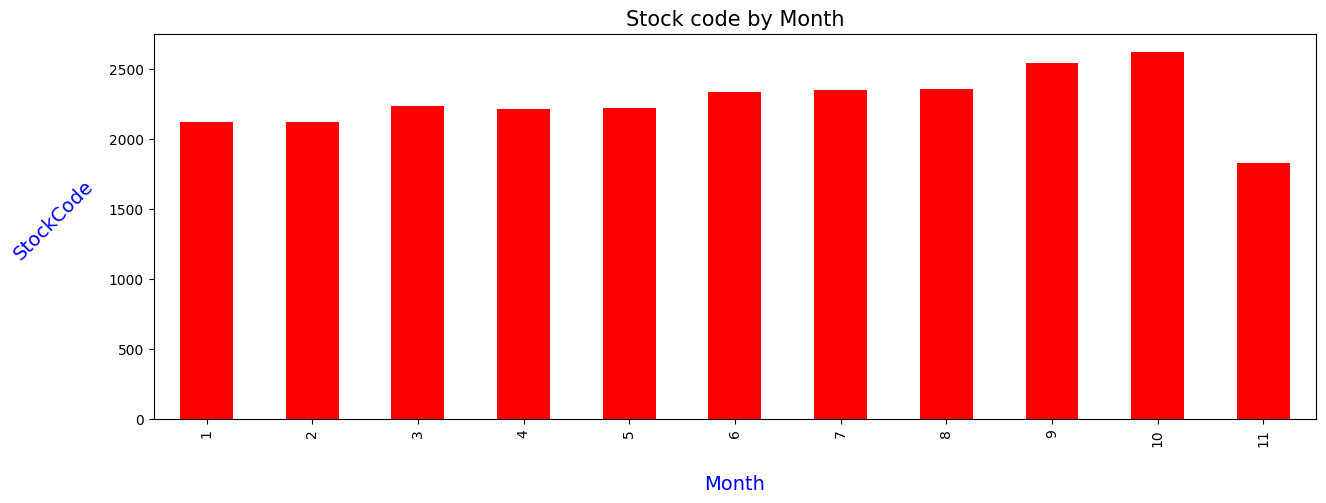

In [45]:
SKU_by_Month.plot(x='Month', y = 'StockCode', kind='bar',
        figsize=(15,5), legend=False, width = .5, color = ["red"])
plt.title('Stock code by Month', fontsize=15);
plt.xlabel('Month' , fontsize = 14, color = 'Blue', labelpad = 20)
plt.ylabel('StockCode', rotation = 45, fontsize = 14, labelpad = 35, color = 'Blue')

Monthly revenue (avg) per order

In [46]:
Monthly_avg_revenue = df.groupby('Month').agg({'Revenue' : 'mean'}).reset_index()
Monthly_avg_revenue

,Month,Revenue
0,1,26.820132
1,2,22.437643
2,3,21.911939
3,4,20.720737
4,5,23.959980
5,6,24.322740
6,7,22.368920
7,8,23.890123
8,9,23.803107
9,10,20.972189


Text(0, 0.5, 'Revenue')

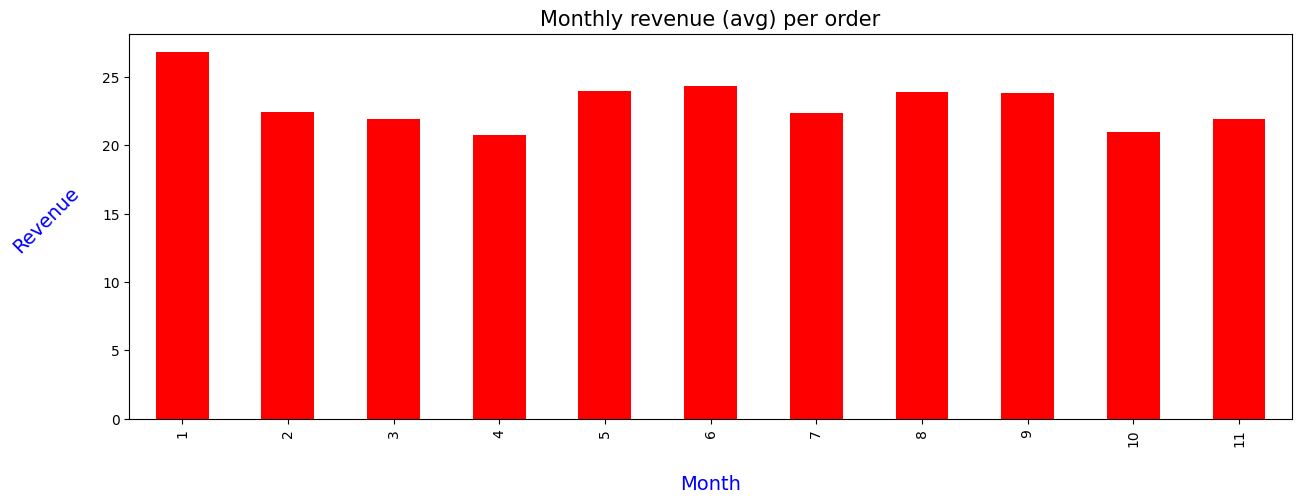

In [47]:
Monthly_avg_revenue.plot(x='Month', y = 'Revenue', kind='bar',
        figsize=(15,5), legend=False, width = .5, color = ["red"])
plt.title('Monthly revenue (avg) per order', fontsize=15);
plt.xlabel('Month' , fontsize = 14, color = 'Blue', labelpad = 20)
plt.ylabel('Revenue', rotation = 45, fontsize = 14, labelpad = 35, color = 'Blue')

 Find whether a customer is the new customer or not. A new customer would be figured
out based on their first date of purchase. Figure out new customer on monthly basis. 

In [48]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011,1,4
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011,1,4
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011,1,4


In [49]:
first_purchase_date = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()

In [50]:
first_purchase_date['First_purchase_month'] = first_purchase_date['InvoiceDate'].dt.month

In [51]:
first_purchase_date

,CustomerID,InvoiceDate,First_purchase_month
0,12346.0,2011-01-18 10:01:00,1
1,12347.0,2011-01-26 14:30:00,1
2,12348.0,2011-01-25 10:42:00,1
3,12350.0,2011-02-02 16:01:00,2
4,12352.0,2011-02-16 12:33:00,2
...,...,...,...
3874,18280.0,2011-03-07 09:52:00,3
3875,18281.0,2011-06-12 10:53:00,6
3876,18282.0,2011-08-05 13:35:00,8
3877,18283.0,2011-01-06 14:14:00,1


In [52]:
first_purchase_date.columns  = ['CustomerID' , 'FirstPurchaseDate', 'FirstPurchaseMonth']

In [53]:
first_purchase_date

,CustomerID,FirstPurchaseDate,FirstPurchaseMonth
0,12346.0,2011-01-18 10:01:00,1
1,12347.0,2011-01-26 14:30:00,1
2,12348.0,2011-01-25 10:42:00,1
3,12350.0,2011-02-02 16:01:00,2
4,12352.0,2011-02-16 12:33:00,2
...,...,...,...
3874,18280.0,2011-03-07 09:52:00,3
3875,18281.0,2011-06-12 10:53:00,6
3876,18282.0,2011-08-05 13:35:00,8
3877,18283.0,2011-01-06 14:14:00,1


Now we find new customer on monthly basis (we use groupby and count function)

In [54]:
first_purchase_date.groupby("FirstPurchaseMonth")["CustomerID"].count().reset_index()

,FirstPurchaseMonth,CustomerID
0,1,741
1,2,496
2,3,539
3,4,361
4,5,319
5,6,268
6,7,213
7,8,185
8,9,316
9,10,375


Find total revenue per month for new and existing customer per month. Show it in a
visual

In [55]:
#create a dataframe contaning CustomerID and first purchase date, first purchase month
df = pd.merge(df,first_purchase_date, on = "CustomerID")
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,FirstPurchaseDate,FirstPurchaseMonth
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011,1,4,2011-01-04 10:00:00,1
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04 10:00:00,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04 10:00:00,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04 10:00:00,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011,1,4,2011-01-04 10:00:00,1


In [56]:
#create a column called Customer Type and assign New 
df['CustomerType'] = 'New'

In [57]:
#if User's FirstPurchaseMonth before the selected Month
df.loc[df.Month > df.FirstPurchaseMonth, 'CustomerType'] = 'Old'
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,FirstPurchaseDate,FirstPurchaseMonth,CustomerType
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011,1,4,2011-01-04 10:00:00,1,New
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04 10:00:00,1,New
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04 10:00:00,1,New
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04 10:00:00,1,New
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011,1,4,2011-01-04 10:00:00,1,New


In [58]:
revenue_by_Customer_type_month = df.groupby(['Month','CustomerType']).Revenue.sum().round(2).unstack()
revenue_by_Customer_type_month.fillna(0, inplace = True)
revenue_by_Customer_type_month

CustomerType,New,Old
Month,,
1,569445.04,0.00
2,231473.83,215663.52
3,232766.70,362734.06
4,146245.98,322954.38
5,136363.27,542231.29
6,143518.95,517694.74
7,85134.29,514956.72
8,85810.62,559533.28
9,164926.87,787911.51


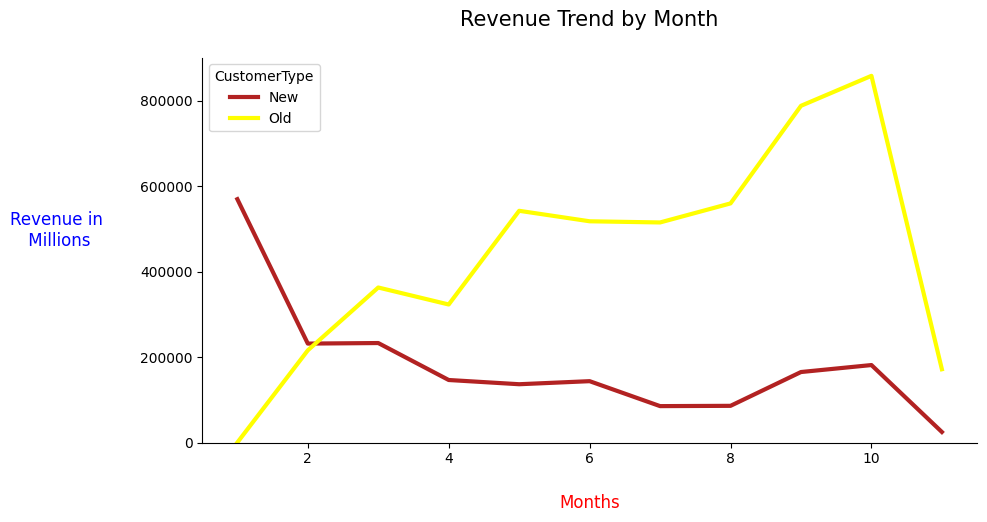

In [59]:
revenue_by_Customer_type_month.plot(figsize= (10, 5), linewidth = 3,
                      color = ['firebrick','yellow'])
plt.ylim(0 , None)
plt.title('Revenue Trend by Month\n', fontsize = 15)
plt.xlabel('Months' , fontsize = 12, color = 'red', position = (.5 , 1), labelpad = 20)
plt.ylabel('Revenue in\n Millions', rotation = 0, position = (1 , .4), fontsize = 12, labelpad = 60, color = 'blue')
sns.despine()

Calculate total revenue per month by day for new and existing customer – in same
graph. (You can use line graph)

In [60]:
revenue_by_Customer_type_day = df.groupby(['Month','Day','CustomerType']).Revenue.sum().round(2).unstack()
revenue_by_Customer_type_day.fillna(0, inplace = True)
revenue_by_Customer_type_day

CustomerType       New       Old
Month Day                       
1     4       12125.46      0.00
      5       28803.63      0.00
      6       34360.19      0.00
      7       23797.79      0.00
      9       15778.20      0.00
...                ...       ...
11    1        3008.93  26123.88
      2        7797.75  30936.95
      3        4920.84  55751.27
      4        6504.56  49594.68
      6        2347.79   9000.43

[256 rows x 2 columns]

Text(1, 0.5, 'Revenue in\n Millions')

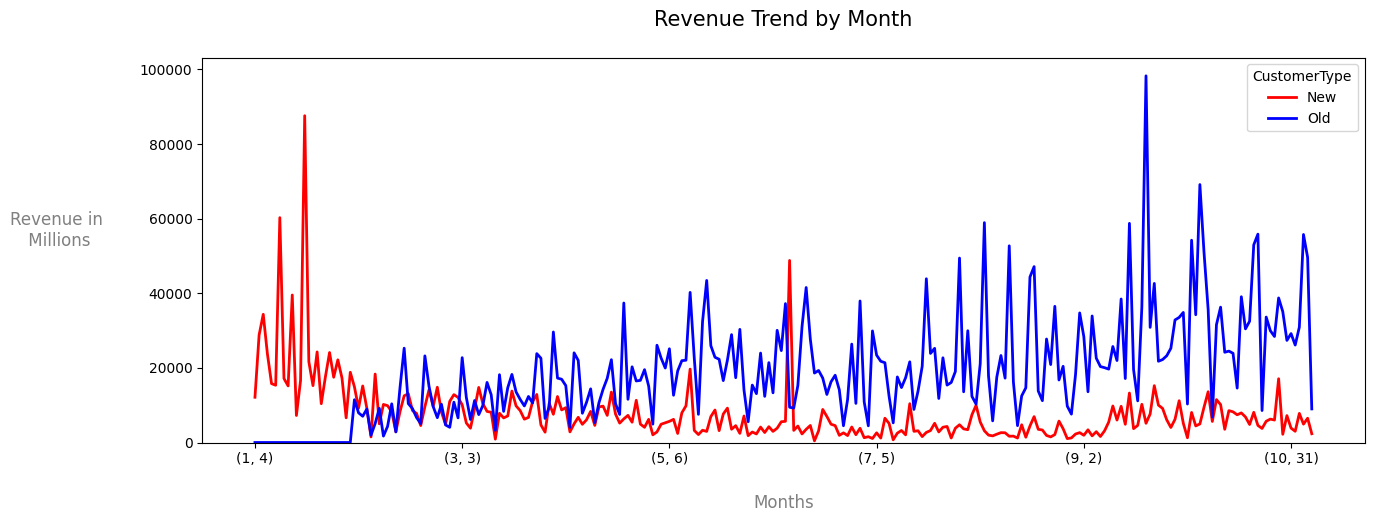

In [61]:
revenue_by_Customer_type_day.plot(figsize= (15, 5), linewidth = 2,
                      color = ["red",'blue'])
plt.ylim(0 , None)
plt.title('Revenue Trend by Month\n', fontsize = 15)
plt.xlabel('Months' , fontsize = 12, color = 'gray', position = (.5 , 1), labelpad = 20)
plt.ylabel('Revenue in\n Millions', rotation = 0, position = (1 , .4), fontsize = 12, labelpad = 60, color = 'gray')

Calculate monthly retention rate

In [62]:
customer_purchase_data = df.groupby(['CustomerID' , 'Month']).Revenue.sum().reset_index()
customer_purchase_data

,CustomerID,Month,Revenue
0,12346.0,1,77183.60
1,12347.0,1,475.39
2,12347.0,4,636.25
3,12347.0,6,382.52
4,12347.0,8,584.91
...,...,...,...
10219,18283.0,7,143.19
10220,18283.0,9,134.90
10221,18283.0,10,114.65
10222,18287.0,5,765.28


In [63]:
rentation_data = pd.crosstab(customer_purchase_data.CustomerID, customer_purchase_data.Month).reset_index()
rentation_data

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11
0,12346.0,1,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,0,0,1,0,1,0,1,0,1,0
2,12348.0,1,0,0,1,0,0,0,0,1,0,0
3,12350.0,0,1,0,0,0,0,0,0,0,0,0
4,12352.0,0,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3874,18280.0,0,0,1,0,0,0,0,0,0,0,0
3875,18281.0,0,0,0,0,0,1,0,0,0,0,0
3876,18282.0,0,0,0,0,0,0,0,1,0,0,0
3877,18283.0,1,1,0,1,1,1,1,0,1,1,0


In [64]:
#Check(isin() method is used to filter data frames.)
df[df.CustomerID.isin(['12348.0'])]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,FirstPurchaseDate,FirstPurchaseMonth,CustomerType


In [65]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,FirstPurchaseDate,FirstPurchaseMonth,CustomerType
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011,1,4,2011-01-04 10:00:00,1,New
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04 10:00:00,1,New
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04 10:00:00,1,New
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04 10:00:00,1,New
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011,1,4,2011-01-04 10:00:00,1,New


Part B

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.RFM stands for the three dimensions:

Recency – How recently did the customer purchase.
Frequency – How often do they purchase. 
Monetary Value – How much do they spend.

RFM stands for Recency - Frequency - Monetary Value.
1.Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.

2.Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.

3.High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.




In [66]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division

In [67]:
df = pd.read_csv("OnlineRetail.csv", encoding = 'latin')
                

In [68]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10.0,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25.0,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25.0,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5.0,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10.0,1/4/2011 10:00,1.25,13313.0,United Kingdom
5,539993,85099B,JUMBO BAG RED RETROSPOT,10.0,1/4/2011 10:00,1.95,13313.0,United Kingdom
6,539993,20682,RED RETROSPOT CHILDRENS UMBRELLA,6.0,1/4/2011 10:00,3.25,13313.0,United Kingdom
7,539993,22961,JAM MAKING SET PRINTED,12.0,1/4/2011 10:00,1.45,13313.0,United Kingdom
8,539993,22667,RECIPE BOX RETROSPOT,6.0,1/4/2011 10:00,2.95,13313.0,United Kingdom
9,539993,22898,CHILDRENS APRON APPLES DESIGN,8.0,1/4/2011 10:00,1.95,13313.0,United Kingdom


In [69]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [70]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10.0,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25.0,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25.0,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5.0,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10.0,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [71]:
df.nunique()

InvoiceNo      20438
StockCode       3949
Description     4037
Quantity         640
InvoiceDate    18489
UnitPrice       1418
CustomerID      3968
Country           37
dtype: int64

In [72]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description     1253
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     96744
Country            1
dtype: int64

In [73]:
df = df.dropna(subset = ['CustomerID'])

In [74]:
df = df.drop("Description", axis = 1)

In [75]:
df = df[df.Quantity > 0]

In [76]:
df[df.Quantity<= 0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [77]:
df[df.UnitPrice < 0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [78]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

<ipython-input-78-f323997acbf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [79]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,539993,22386,10.0,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5
1,539993,21499,25.0,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
2,539993,21498,25.0,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
3,539993,22379,5.0,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5
4,539993,20718,10.0,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5


Calculate recency by finding inactive days for each customer. And then apply K – means
clustering to figure out recency score against each customer

In [80]:
df_new = pd.DataFrame(df['CustomerID'].unique())
df_new.columns = ['CustomerID']


In [81]:
last_purchase_date = df.groupby('CustomerID').InvoiceDate.max().reset_index()

In [82]:
last_purchase_date.columns = ['CustomerID','lastpurchasedate']


In [83]:
last_purchase_date['Recency'] = (last_purchase_date['lastpurchasedate'].max() - last_purchase_date['lastpurchasedate']).dt.days


In [84]:
df_new = pd.merge(df_new, last_purchase_date[['CustomerID','Recency']], on='CustomerID')


In [85]:
df_new


,CustomerID,Recency
0,13313.0,6
1,18097.0,97
2,16656.0,1
3,16875.0,37
4,13094.0,50
...,...,...
3938,17197.0,0
3939,16025.0,0
3940,12659.0,0
3941,17461.0,0


In [86]:
df_new.Recency.describe()

count    3943.000000
mean       82.706061
std        84.546761
min         0.000000
25%        16.000000
50%        45.000000
75%       135.000000
max       310.000000
Name: Recency, dtype: float64

We see that even though the average is 84 day recency, median is 47.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

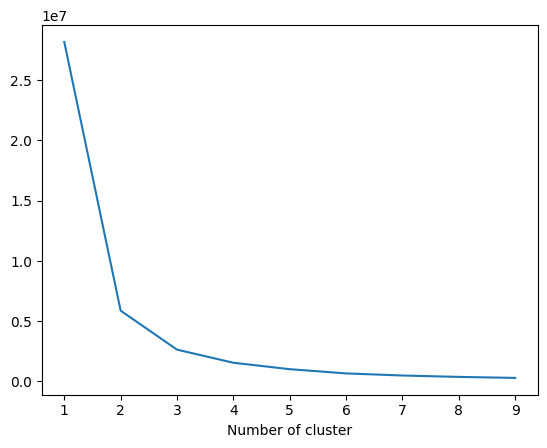

In [87]:
from sklearn.cluster import KMeans

sse={}
recency_data = df_new[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency_data)
    recency_data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

We can see here from the graph that 3 might be the optimal cluster, but we select 4 

In [88]:

#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(recency_data[['Recency']])
df_new['RecencyCluster'] = kmeans.predict(df_new[['Recency']])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [89]:
df_new.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,594.0,153.062290,24.074809,113.0,132.0,153.0,174.0,198.0
1,1940.0,18.159278,13.438911,0.0,6.0,15.0,30.0,44.0
2,557.0,249.491921,30.822922,202.0,223.0,246.0,278.0,310.0
3,852.0,71.590376,19.792580,45.0,55.0,66.0,87.0,112.0


In [90]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_new = order_cluster('RecencyCluster', 'Recency',df_new,False)

In [91]:
df_new.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,557.0,249.491921,30.822922,202.0,223.0,246.0,278.0,310.0
1,594.0,153.062290,24.074809,113.0,132.0,153.0,174.0,198.0
2,852.0,71.590376,19.792580,45.0,55.0,66.0,87.0,112.0
3,1940.0,18.159278,13.438911,0.0,6.0,15.0,30.0,44.0


recency clusters have different characteristics. The customers in Cluster 3 are very recent compared to Cluster 0.

3 has most recent customer where 0 has most inactive customer.

use order_cluster() function to assign cluster in order.

2.Calculate frequency by finding inactive days for each customer. And then apply K – means clustering to figure out recency score against each customer

Calculate frequency by finding total number of orders for each customer and then apply K – means clustering to figure out the frequency cluster for each customer.

To create frequency clusters, we need to find total number orders for each customer.

In [92]:
frequency_data = df.groupby('CustomerID').InvoiceDate.count().reset_index()

In [93]:
frequency_data.columns = ['CustomerID','Frequency']


In [94]:
frequency_data.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,140
2,12348.0,14
3,12350.0,17
4,12352.0,85


In [95]:
df_new = pd.merge(df_new, frequency_data, on='CustomerID')

In [96]:
df_new.head()


,CustomerID,Recency,RecencyCluster,Frequency
0,13313.0,6,3,64
1,16656.0,1,3,66
2,16875.0,37,3,112
3,17315.0,0,3,421
4,14606.0,0,3,2165


In [97]:
df_new.Frequency.describe()


count    3943.000000
mean       78.235354
std       178.092306
min         1.000000
25%        16.000000
50%        37.000000
75%        86.000000
max      6101.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

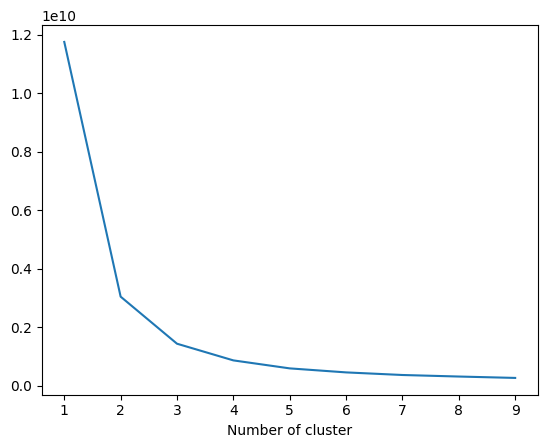

In [98]:
sse={}
tx_frequency = frequency_data[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(frequency_data)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()


In [99]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(frequency_data[['Frequency']])
df_new['FrequencyCluster'] = kmeans.predict(df_new[['Frequency']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [100]:
df_new.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3509.0,43.952693,38.626188,1.0,14.0,30.0,64.0,163.0
1,19.0,1408.315789,543.822791,891.0,961.5,1310.0,1713.0,2688.0
2,2.0,5198.000000,1277.034847,4295.0,4746.5,5198.0,5649.5,6101.0
3,413.0,283.530266,113.122655,164.0,200.0,246.0,338.0,757.0


In [101]:
df_new = order_cluster('FrequencyCluster', 'Frequency',df_new,True)

In [102]:
df_new.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3509.0,43.952693,38.626188,1.0,14.0,30.0,64.0,163.0
1,413.0,283.530266,113.122655,164.0,200.0,246.0,338.0,757.0
2,19.0,1408.315789,543.822791,891.0,961.5,1310.0,1713.0,2688.0
3,2.0,5198.000000,1277.034847,4295.0,4746.5,5198.0,5649.5,6101.0


0 frequency cluster have better customer 

High frequency number indicates better customers.


Calculate Monetry value by finding total number of orders for each customer and then apply K – means clustering to figure out the monnetry cluster for each customer.

In [103]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']


In [104]:
monetry_data = df.groupby('CustomerID').Revenue.sum().reset_index()

In [105]:
monetry_data.rename(columns = {'Revenue' : 'Monetry'},inplace = True)
monetry_data.head()


,CustomerID,Monetry
0,12346.0,77183.60
1,12347.0,3373.39
2,12348.0,904.44
3,12350.0,334.40
4,12352.0,2506.04


In [106]:
df_new = pd.merge(df_new, monetry_data, on='CustomerID')



In [107]:
df_new.Monetry.describe()


count      3943.000000
mean       1786.347186
std        7760.916401
min           2.900000
25%         292.360000
50%         628.380000
75%        1509.900000
max      248657.940000
Name: Monetry, dtype: float64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

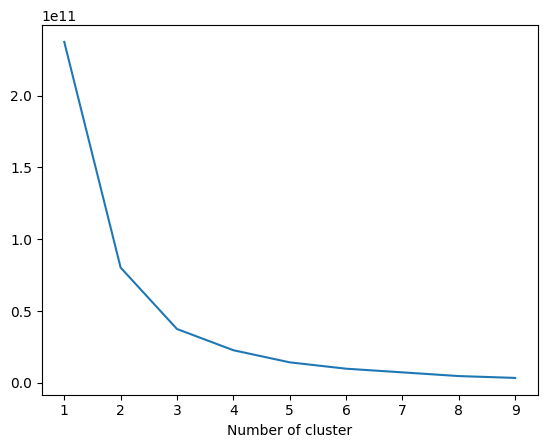

In [108]:
sse={}
monetry_data = monetry_data[['Monetry']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(monetry_data)
    monetry_data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [109]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(monetry_data[['Monetry']])
df_new['MonetryCluster'] = kmeans.predict(df_new[['Monetry']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [110]:
df_new = order_cluster('MonetryCluster', 'Monetry',df_new,True)

In [111]:
df_new.groupby('MonetryCluster')['Monetry'].describe()

,count,mean,std,min,25%,50%,75%,max
MonetryCluster,,,,,,,,
0,3904.0,1244.412511,1805.597463,2.90,290.260,620.405,1469.8375,16326.49
1,30.0,32870.619667,12296.520080,17407.18,23033.095,28240.895,43379.8500,56945.38
2,6.0,93065.498333,22748.025463,67912.32,74057.375,93602.030,110531.7500,119559.13
3,3.0,213622.976667,38651.999352,172159.92,196105.495,220051.070,234354.5050,248657.94


Monetry Cluster 0 have highest revenue

In [112]:
df_new.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetry,MonetryCluster
0,13313.0,6,3,64,0,1242.64,0
1,16656.0,1,3,66,0,7901.90,0
2,16875.0,37,3,112,0,2095.53,0
3,12957.0,42,3,160,0,2640.72,0
4,17188.0,0,3,53,0,1371.71,0


In [113]:
df_new.iloc[:,1:4].describe()

,Recency,RecencyCluster,Frequency
count,3943.000000,3943.000000,3943.000000
mean,82.706061,2.058838,78.235354
std,84.546761,1.097521,178.092306
min,0.000000,0.000000,1.000000
25%,16.000000,1.000000,16.000000
50%,45.000000,2.000000,37.000000
75%,135.000000,3.000000,86.000000
max,310.000000,3.000000,6101.000000


Add RFM to find out total score

In [114]:
df_new['OverallScore'] = df_new['RecencyCluster'] + df_new['FrequencyCluster'] + df_new['MonetryCluster']

In [115]:
df_new.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetry,MonetryCluster,OverallScore
0,13313.0,6,3,64,0,1242.64,0,3
1,16656.0,1,3,66,0,7901.90,0,3
2,16875.0,37,3,112,0,2095.53,0,3
3,12957.0,42,3,160,0,2640.72,0,3
4,17188.0,0,3,53,0,1371.71,0,3


categorise customer among best, medium and worst customer. 

In [116]:
df_new.groupby('OverallScore')['Recency','Frequency','Monetry'].mean()


<ipython-input-116-7f3aed14d082>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new.groupby('OverallScore')['Recency','Frequency','Monetry'].mean()


,Recency,Frequency,Monetry
OverallScore,,,
0,249.587703,21.513562,374.452532
1,153.791096,32.068493,655.396731
2,72.997540,47.230012,1108.627012
3,21.122525,62.687500,1276.961876
4,13.348974,282.439883,4987.017566
5,9.700000,689.850000,20208.428500
6,3.200000,1381.400000,49149.958000
7,3.750000,2020.000000,133484.830000
8,0.000000,3076.500000,179339.200000


score shows us that customers with score 8 is best customers whereas 0 is the worst.

0 to 2: Low Value ,Improve Retention
3 to 4: Mid Value , mprove Retention + Increase Frequency
5+: High Value, Improve Retention
